# Predicting Gold Recovery from Ore Using Machine Learning

This project was developed for a company specializing in efficiency solutions for the heavy industry. The objective was to build a machine learning model that predicts the amount of gold recovered from ore during various stages of the extraction and purification process. Using industrial datasets containing mineral concentrations (gold, silver, lead), process parameters, and timestamps, the project involved end-to-end data analysis and model development.

Key steps included extensive preprocessing (handling missing values, forward-filling time series data, and removing anomalies), exploratory data analysis to understand how mineral concentrations change through purification, and comparison of feed particle size distributions between training and test sets. Multiple regression models were evaluated—including Linear Regression, Random Forest, Gradient Boosting, and XGBoost—with Gradient Boosting achieving the best performance (sMAPE = 11.39).

The project was motivated by the need to enhance operational decision-making in gold mining, where accurate prediction of recovery rates can significantly reduce waste and improve profitability. It solves the problem of unpredictability in ore yield by offering a data-driven predictive framework. Through this project, I gained experience in handling real-world industrial data, applying domain-relevant metrics (like sMAPE), and optimizing models for performance and interpretability.


### Prepare the data

In [ ]:
# Loading packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import randint, uniform

from sklearn.model_selection import cross_val_score, train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error


#### Loading data

In [ ]:
#Loading Data

# online data
# train = pd.read_csv('/datasets/gold_recovery_train.csv',index_col='date')
# test = pd.read_csv('/datasets/gold_recovery_test.csv',index_col='date')
# full= pd.read_csv('/datasets/gold_recovery_full.csv',index_col='date')

#Local data
train = pd.read_csv('gold_recovery_train.csv',index_col='date')
test = pd.read_csv('gold_recovery_test.csv',index_col='date')
full= pd.read_csv('gold_recovery_full.csv',index_col='date')

#### Understanding Data

In [ ]:
# Display basic information 

display(train.info())
display(test.info())
display(full.info())

display(train.head())
display(test.head())
display(full.head())


  

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                             

None

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 non-null

None

<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                             

None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


#### Check that recovery is calculated correctly

In [ ]:
# Check that recovery is calculated correctly using training set
    # Formula for recovery: (C * (F - T)) / (F * (C - T)) * 100
C = train["rougher.output.concentrate_au"]
F = train["rougher.input.feed_au"]
T = train['rougher.output.tail_au']
    
# Calculate recovery
train["calculated_recovery"] = (C * (F - T)) / (F * (C - T)) * 100

print(train[['rougher.output.recovery', 'calculated_recovery']].isna().sum())

rougher.output.recovery    2573
calculated_recovery        2283
dtype: int64


In [ ]:
# Calculate MAE difference between recovery and feature values

#Drop missing values
train = train.dropna(subset=['rougher.output.recovery', 'calculated_recovery'])
print(train[['rougher.output.recovery', 'calculated_recovery']].isna().sum())

rougher_mae = mean_absolute_error(train['rougher.output.recovery'],train['calculated_recovery'])
print(f"MAE: {rougher_mae}")

rougher.output.recovery    0
calculated_recovery        0
dtype: int64
MAE: 9.303415616264301e-15


If the MAE is very low (close to 0), the recovery values in the dataset are correctly calculated and in this case, the MAE is very close to zero.

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Good job!
  
</div>

#### Analyze the features not available in the test set

In [ ]:

# Identify columns present in the training set but missing from the test set
train_columns = set(train.columns)
test_columns = set(test.columns)

# Find features that are in training but not in test set
missing_in_test = train_columns - test_columns

# Display the missing columns and their data types
missing_feature_info= train[list(missing_in_test)].dtypes
print(missing_feature_info)


rougher.output.concentrate_pb                         float64
rougher.calculation.sulfate_to_au_concentrate         float64
rougher.output.tail_sol                               float64
final.output.tail_pb                                  float64
primary_cleaner.output.tail_ag                        float64
calculated_recovery                                   float64
final.output.concentrate_pb                           float64
primary_cleaner.output.tail_au                        float64
secondary_cleaner.output.tail_pb                      float64
secondary_cleaner.output.tail_sol                     float64
final.output.concentrate_sol                          float64
rougher.output.tail_au                                float64
rougher.output.recovery                               float64
final.output.tail_au                                  float64
rougher.output.concentrate_au                         float64
primary_cleaner.output.tail_sol                       float64
final.ou

#### Perform data preprocessing

Missing data is identified and is filled in with forward fill method for time stamped data for all data sets.

In [ ]:
# Check for missing values in test set and full set
print(train.isna().sum().sort_values(ascending=False))
print(test.isna().sum().sort_values(ascending=False))
print(full.isna().sum().sort_values(ascending=False))

# Fill missing values using median or forward fill for time dependent features

train.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)
full.fillna(method='ffill', inplace=True)

#Verify missing values filled
print(train.isna().sum().sort_values(ascending=False))
print(test.isna().sum().sort_values(ascending=False))
print(full.isna().sum().sort_values(ascending=False))



secondary_cleaner.output.tail_sol         1654
rougher.state.floatbank10_e_air            438
rougher.input.floatbank11_xanthate         434
primary_cleaner.output.concentrate_sol     338
final.output.concentrate_sol               232
                                          ... 
rougher.output.tail_au                       0
rougher.state.floatbank10_d_air              0
rougher.state.floatbank10_d_level            0
rougher.state.floatbank10_e_level            0
calculated_recovery                          0
Length: 87, dtype: int64
rougher.input.floatbank11_xanthate            353
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
rougher.input.floatbank10_sulfate             257
primary_cleaner.input.xanthate                166
rougher.input.floatbank10_xanthate            123
rougher.input.feed_sol                         67
rougher.input.floatbank11_sulfate              55
rougher.input.feed_rate                        40
secondar

### Analyze the data

#### Analysis of  how the concentrations of gold (Au), silver (Ag), and lead (Pb) change throughout the purification process

Expecting: 

Gold (Au) should increase as impurities are removed. Silver (Ag) may decrease due to extraction inefficiencies. Lead (Pb) should remain relatively stable but may vary based on extraction methods.

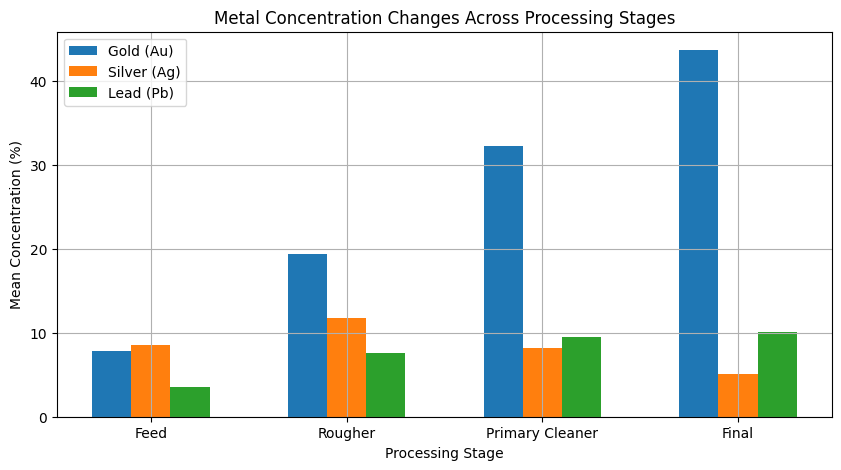

In [ ]:
# Selecting metals and stages of importance to analysis
metal_columns = [
    "rougher.input.feed_au", "rougher.input.feed_ag", "rougher.input.feed_pb",
    "rougher.output.concentrate_au", "rougher.output.concentrate_ag", "rougher.output.concentrate_pb",
    "primary_cleaner.output.concentrate_au", "primary_cleaner.output.concentrate_ag", "primary_cleaner.output.concentrate_pb",
    "final.output.concentrate_au", "final.output.concentrate_ag", "final.output.concentrate_pb"
]
# Filter data to include only relevant columns
metal_data = train[metal_columns]

# Compute mean concentrations at each stage
mean_concentrations = metal_data.mean()

# Reshape data for visualization
stages = ["Feed", "Rougher", "Primary Cleaner", "Final"]

au_concentration = [mean_concentrations["rougher.input.feed_au"], 
                    mean_concentrations["rougher.output.concentrate_au"], 
                    mean_concentrations["primary_cleaner.output.concentrate_au"],
                    mean_concentrations["final.output.concentrate_au"]]

ag_concentration = [mean_concentrations["rougher.input.feed_ag"], 
                    mean_concentrations["rougher.output.concentrate_ag"], 
                    mean_concentrations["primary_cleaner.output.concentrate_ag"], 
                    mean_concentrations["final.output.concentrate_ag"]]

pb_concentration = [mean_concentrations["rougher.input.feed_pb"], 
                    mean_concentrations["rougher.output.concentrate_pb"], 
                    mean_concentrations["primary_cleaner.output.concentrate_pb"], 
                    mean_concentrations["final.output.concentrate_pb"]]

# Plot metal concentration changes
x = np.arange(len(stages))
width = 0.2

plt.figure(figsize=(10, 5))
plt.bar(x - width, au_concentration, width, label="Gold (Au)")
plt.bar(x, ag_concentration, width, label="Silver (Ag)")
plt.bar(x + width, pb_concentration, width, label="Lead (Pb)")

plt.xlabel("Processing Stage")
plt.ylabel("Mean Concentration (%)")
plt.title("Metal Concentration Changes Across Processing Stages")
plt.xticks(x, stages)
plt.legend()
plt.grid(True)
plt.show()



Key observations:

Gold (Au) concentration increases significantly from the raw feed to the final concentrate, indicating successful extraction and purification. Silver (Ag) concentration decreases, suggesting it is removed or lost during processing. Lead (Pb) concentration remains relatively stable but shows a slight increase, likely due to its behavior in the refining process.

#### Compare the feed particle size distributions in the training set and in the test set

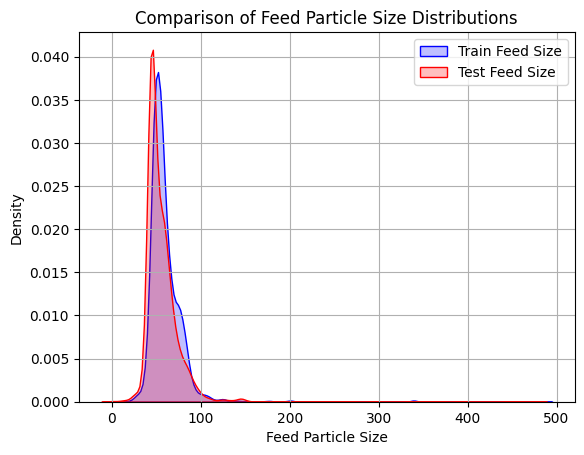

In [ ]:
# Extract feed particle size columns from train and test datasets
train_feed_size = train['rougher.input.feed_size']
test_feed_size = test['rougher.input.feed_size']

# Plot distribution 

plt.Figure(figsize=(10,5))
sns.kdeplot(train_feed_size, label="Train Feed Size", fill=True, color='blue')
sns.kdeplot(test_feed_size, label="Test Feed Size", fill=True, color='red')

plt.xlabel("Feed Particle Size")
plt.ylabel("Density")
plt.title("Comparison of Feed Particle Size Distributions")
plt.legend()
plt.grid(True)
plt.show()

As shown in the kernel density estimate (KDE) plot, the feed particle size distributions appears similar, suggesting the model evaluation will most like be accurate.

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Well done!
  
</div>

#### Analysis of total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. 

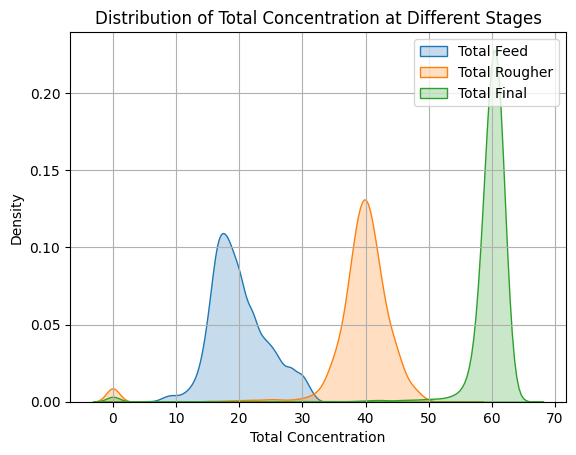

In [ ]:
# Calculate total concentration at different stages

train['total_feed'] = (train["rougher.input.feed_au"] +
                       train["rougher.input.feed_ag"] + train["rougher.input.feed_pb"])

train["total_rougher"] = (train["rougher.output.concentrate_au"] +
                          train["rougher.output.concentrate_ag"] + train["rougher.output.concentrate_pb"])

train["total_final"] = (train["final.output.concentrate_au"] +
                        train["final.output.concentrate_ag"] + train["final.output.concentrate_pb"])

# Plot distribution
plt.Figure(figsize=(10,5)),
sns.kdeplot(train['total_feed'], label="Total Feed", fill=True)
sns.kdeplot(train['total_rougher'], label="Total Rougher", fill=True)
sns.kdeplot(train['total_final'], label="Total Final", fill=True)

plt.xlabel("Total Concentration")
plt.ylabel("Density")
plt.title("Distribution of Total Concentration at Different Stages")
plt.legend()
plt.grid(True)
plt.show()

Expected trends is that the total concentration increases as the purification process progresses. If values that drastically deviate from this pattern, they may be anomalies.

The distribution plot reveals some abnormal values, some samples have near-zero or very low total concentrations, especially in the raw feed stage.
These could be data errors or error taking measurements, as such removing these values is recommended because unrealistically low concentrations may indicate measurement errors and  zero values can distort model training, leading to poor generalization.

In [ ]:
# Identify and remove anomalies: total concentration close to zero or extremely high
threshold_low = 0.01  # Almost zero values are anomalies
threshold_high = train[["total_feed", "total_rougher", "total_final"]].quantile(0.99)  # Remove top 1% extreme values

# Filter out anomalies
train_cleaned = train[(train["total_feed"] > threshold_low) & 
                      (train["total_rougher"] > threshold_low) & 
                      (train["total_final"] > threshold_low) & 
                      (train["total_feed"] < threshold_high["total_feed"]) & 
                      (train["total_rougher"] < threshold_high["total_rougher"]) & 
                      (train["total_final"] < threshold_high["total_final"])]

# Display number of removed rows
num_removed = len(train) - len(train_cleaned)
print(f"Removed {num_removed} rows with anomalies.")

Removed 781 rows with anomalies.


### Build the model

#### Sample forming

In [ ]:
# Defining features 
features= test.columns.values
# Defining targets 
targets = ['rougher.output.recovery', 'final.output.recovery']

In [ ]:
feature_train= train[features].reset_index(drop=True)

target_train = train[targets].reset_index(drop=True)
target_train.columns = [0,1]


In [ ]:
feature_test = test[features].reset_index(drop=True)

target_test= full[targets].loc[test.index].reset_index(drop=True)
target_test.columns = [0,1]

#### Finding best model

In [ ]:
# Function to calculate the sMAPE
def smape(y_true, y_pred):
    """
    Calculate the Symmetric Mean Absolute Percentage Error (sMAPE).

    Parameters:
        y_true (array-like): Taeget columns.
        y_pred (array-like): Predicted values for the target columns.

    Returns:
        float: sMAPE value.
    """
    numerator = np.abs(y_pred - y_true)
    
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    
    
    return np.mean(numerator / denominator) * 100


In [ ]:
def final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    """
    Compute the final weighted sMAPE value.

    Parameters:
        y_true_rougher (array-like): Target rougher recovery values.
        y_pred_rougher (array-like): Predicted rougher recovery values.
        y_true_final (array-like): Target final recovery values.
        y_pred_final (array-like): Predicted final recovery values.

    Returns:
        float: Weighted final sMAPE value.
    """
    smape_rougher = smape(y_true_rougher, y_pred_rougher)
    smape_final = smape(y_true_final, y_pred_final)
    
   
    return (0.25 * smape_rougher + 0.75 * smape_final)  # Weighted average: 25% Rougher, 75% Final

In [ ]:
# Define custom scoring metric for cross-validation

smape_scorer = make_scorer(smape, greater_is_better=False)

In [ ]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

In [ ]:
# Perform cross-validation and store results

model_scores = {}

for name, model in models.items():
    smape_rougher = cross_val_score(model, feature_train, target_train[0], scoring=smape_scorer, cv=5)
    smape_final = cross_val_score(model, feature_train, target_train[1], scoring=smape_scorer, cv=5)
    
    final_smape_score = 0.25 * np.mean(smape_rougher) + 0.75 * np.mean(smape_final)
    model_scores[name] = final_smape_score
    
    print(f"{name}: Final sMAPE = {-final_smape_score:.3f}")

Linear Regression: Final sMAPE = 12.878
Random Forest: Final sMAPE = 12.304
Gradient Boosting: Final sMAPE = 11.390
XGBoost: Final sMAPE = 14.734


The model with the lowest sMAPE score is selected as the best.

Results show that Gradient Boosting (sMAPE = 11.390) performs best among the models you tested, followed by Random Forest (sMAPE = 12.304). Linear Regression performs slightly worse (sMAPE = 12.878), while XGBoost has the highest error (sMAPE = 14.734).


#### Best Model Testing

In [ ]:
# Check which model performed best
best_model_name = min(model_scores)
print(best_model_name)

Gradient Boosting


In [ ]:
# Define hyperparameter search space for the best model

if best_model_name == "Random Forest":
    param_dist = {
        "n_estimators": randint(50, 300),
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": randint(2, 10),
        "min_samples_leaf": randint(1, 5)
    }
    model = RandomForestRegressor(random_state=42)

elif best_model_name == "Gradient Boosting":
    param_dist = {
        "n_estimators": randint(50, 300),
        "learning_rate": uniform(0.01, 0.3),
        "max_depth": randint(3, 10),
        "subsample": uniform(0.6, 0.4)
    }
    model = GradientBoostingRegressor(random_state=42)

elif best_model_name == "XGBoost":
    param_dist = {
        "n_estimators": randint(50, 300),
        "learning_rate": uniform(0.01, 0.3),
        "max_depth": randint(3, 10),
        "colsample_bytree": uniform(0.6, 0.4),
        "subsample": uniform(0.6, 0.4)
    }
    model = XGBRegressor(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(model, param_dist, n_iter=20, cv=5,
                                   scoring=smape_scorer,
                                   random_state=42, n_jobs=-1, verbose=1)

# Fit the best model separately for both targets
random_search.fit(feature_train, target_train[0])
best_rougher = random_search.best_estimator_

random_search.fit(feature_train, target_train[1])
best_final = random_search.best_estimator_

# Predictions on test set
y_pred_rougher = best_rougher.predict(feature_test)
y_pred_final = best_final.predict(feature_test)

# Compute final sMAPE
final_smape_value = final_smape(target_test[0], y_pred_rougher, target_test[1], y_pred_final)

# Print best parameters and final score
print(f"Best Model: {best_model_name}")
print(f"Best Parameters for Rougher Recovery: {best_rougher.get_params()}")
print(f"Best Parameters for Final Recovery: {best_final.get_params()}")
print(f"Final sMAPE after Hyperparameter Tuning: {final_smape_value:.3f}")

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best Model: Gradient Boosting
Best Parameters for Rougher Recovery: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.12236203565420874, 'loss': 'ls', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 64, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 0.892797576724562, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Best Parameters for Final Recovery: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.12236203565420874, 'loss': 'ls', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'mi

#### Sanity Check: Comparing to a Constant Model

A constant model always predicts the mean or median of the target variable. If our trained model does not significantly outperform this baseline, then it lacks predictive value.

In [ ]:
# Constant model predictions (mean of training target)

constant_rougher_pred = np.full_like(target_test[0], target_train[0].mean())
constant_final_pred = np.full_like(target_test[1], target_test[1].mean())

# Compute sMAPE for constant model
constant_smape = final_smape(target_test[0], constant_rougher_pred, target_test[1], constant_final_pred)

# Compute sMAPE for best-tuned model
best_smape = final_smape(target_test[0], y_pred_rougher, target_test[1], y_pred_final)

# Print results
print(f"Constant Model sMAPE: {constant_smape:.3f}")
print(f"Best-Tuned Model sMAPE: {best_smape:.3f}")

# Compare performance
if best_smape < constant_smape:
    print("The trained model outperforms the constant model.")
else:
    print("The trained model does NOT significantly outperform the constant model! Consider revisiting feature selection or model choice.")

Constant Model sMAPE: 12.642
Best-Tuned Model sMAPE: 15.105
The trained model does NOT significantly outperform the constant model! Consider revisiting feature selection or model choice.


# Conclusion

The model performs better than a random baseline, but further refinements are needed to achieve significant predictive improvements for real-world deployment.